<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/04.%ED%83%90%EC%83%89%EC%A0%81%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch04_01_%ED%9A%8C%EA%B7%80%EB%AC%B8%EC%A0%9CEDA_mpg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.01. 회귀문제 EDA - mpg
---
* 날짜:
* 이름:

## 학습내용
    - mpg 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* seaborn에서 제공하는 `mpg` 데이터셋을 불러오기

In [ ]:
df = sns.load_dataset('mpg')

* 데이터셋 일부 확인

In [ ]:
df.head()
#df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

* 결측지 비율 확인

In [ ]:
df.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* 숫자 자료형의 기술 통계

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='object')

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['origin', 'name']:
  print(col)
  print(df[col].value_counts())

origin
usa       249
japan      79
europe     70
Name: origin, dtype: int64
name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: name, Length: 305, dtype: int64


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

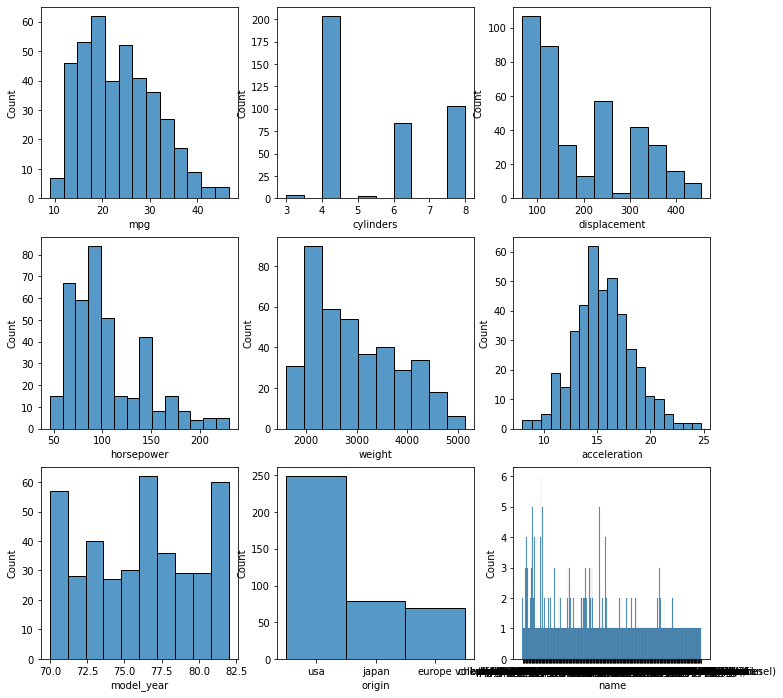

In [ ]:
f, axes = plt.subplots(3,3, figsize=(12,12))
axes = axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [ ]:
nums = ['displacement', 'horsepower', 'weight', 'acceleration']
noms = ['cylinders', 'model_year', 'origin']
y = 'mpg'
print('숫자/연속 자료형',nums)
print('범주 자료형', noms)
print('예측할 속성', y)
print('전처리가 필요한 속성: name')

숫자/연속 자료형 ['displacement', 'horsepower', 'weight', 'acceleration']
범주 자료형 ['cylinders', 'model_year', 'origin']
예측할 속성: mpg
전처리가 필요한 속성: name


* 데이터 정리하기
  * 데이터 소개: 1970년 후반과 1980년 초반의 자동차 연비를 예측한다.
  * 자료형 소개
    * 연속 자료형
      * mpg : 자동차 연비 -> 우리가 예측해야 할 값 MPG는 차량의 연비("연료 소비"라고도 함)를 측정한 것입니다. 이것은 갤런당 마일을 의미합니다. MPG 수치는 XNUMX갤런의 연료로 자동차가 몇 마일을 갈 수 있는지 알려줍니다.
      * displacement: 배수량
      * horspower: 마력
      * acceleration : 가속
    * 이산 자료형
      * cylinders: 실린더 수
      * weight: 자동차 무게
      * model_year: 자동차 모델 연도
    * 범주 자료형
      * origin: 자동차 생산 국가
      * name: 자동차 이름
  * 모델링을 위한 자료형 구분
    * 연속형
      * displacement
      * horsepower
      * acceleration
      * weights
    * 범주형
      * cylinders 
      * model_year
      * origin
    * 추가 처리
      * name
    * 예측값
      * mpg



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

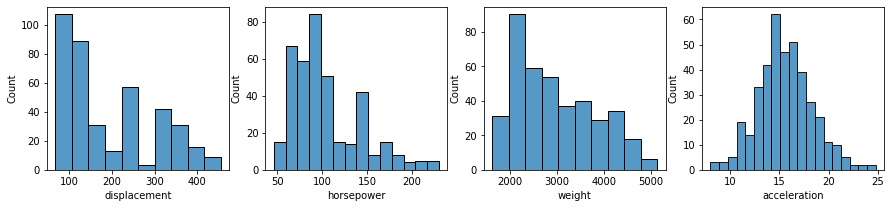

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize=(15,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

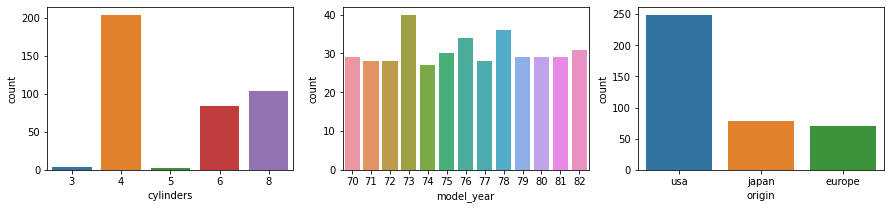

In [ ]:
f, axes = plt.subplots(1, len(noms), figsize=(15,3))
axes = axes.flatten()
for col, ax in zip(noms, axes):
  sns.countplot(data=df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

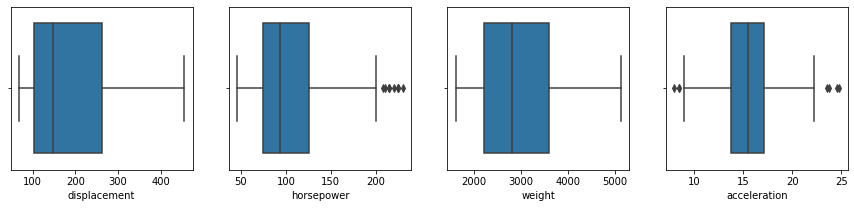

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize=(15,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.boxplot(data=df, x=col, ax=ax)
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

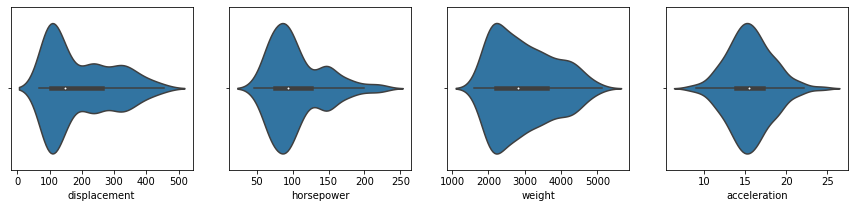

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize=(15,3))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.violinplot(data=df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

### **| 예측값에 대한 추가 시각화**

* displot으로 그리기


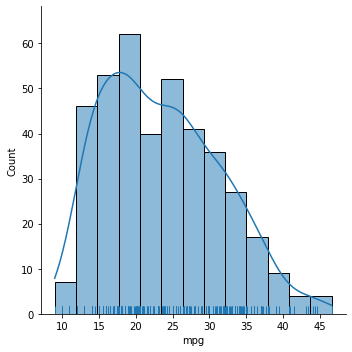

In [ ]:
_=sns.displot(data=df, x='mpg', kde=True, rug=True) 

* `boxplot`으로 기술통계 시각화 하기

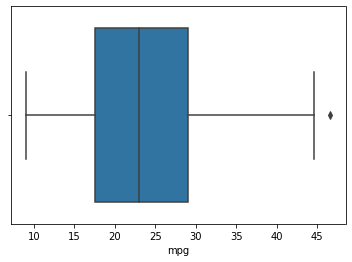

In [ ]:
_=sns.boxplot(data=df,x='mpg')

* `violinplot`으로 기술통계 시각화 하기

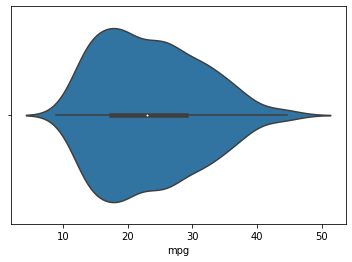

In [ ]:
_=sns.violinplot(data=df,x='mpg')

* `describe` 로 `mpg`의 기술통계 값 구하기

In [ ]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

* `mpg` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [ ]:
df['mpg'].agg(['mean', 'min', 'max', 'skew','kurt'])

mean    23.514573
min      9.000000
max     46.600000
skew     0.457066
kurt    -0.510781
Name: mpg, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

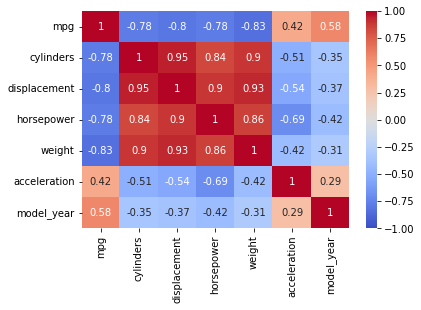

In [ ]:
_=sns.heatmap(df.corr(), cmap='coolwarm',annot=True, vmax=1, vmin=-1)

* 예측값과 관련있는 속성 순서대로 정리하기

In [ ]:
# displacement, weight 가 높은 음의 상관관계
# cylinders, horspower가 그다음 높은 음의 상관관계
# acceleration, model_year 약한 양의 상관관계

# 배수량, 무게, 실린더 개수, 마력의 값이 클 수록 연비가 낮다

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

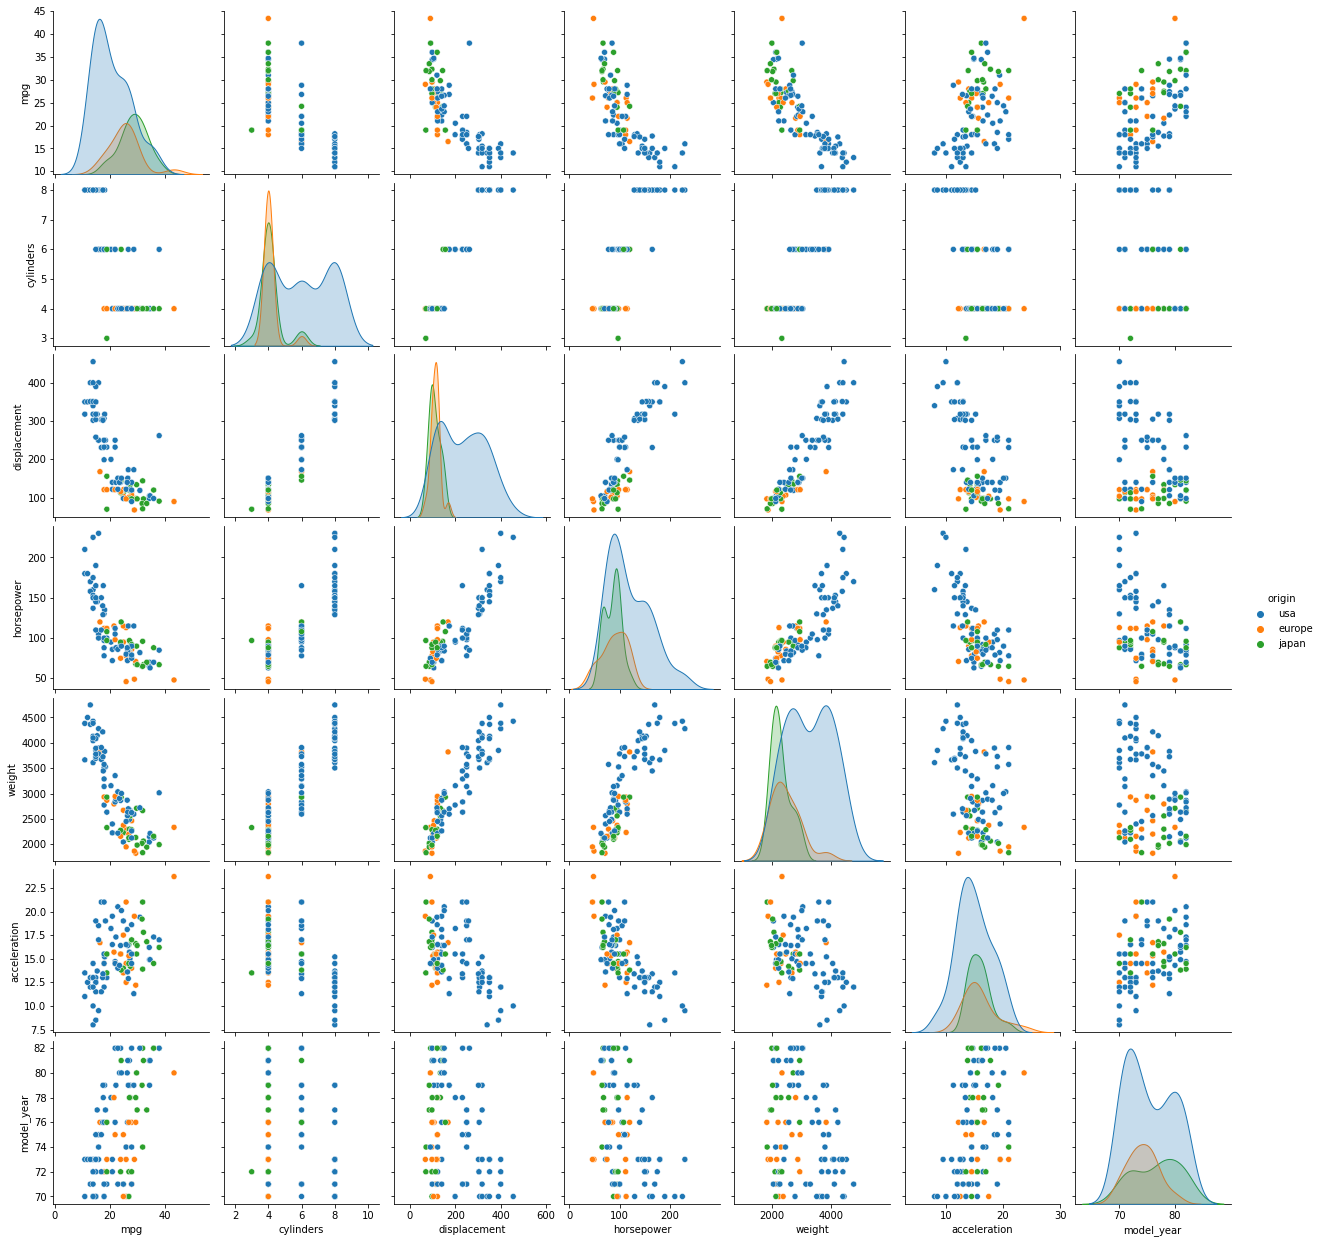

In [ ]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.
_=sns.pairplot(df.sample(100), hue='origin')

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

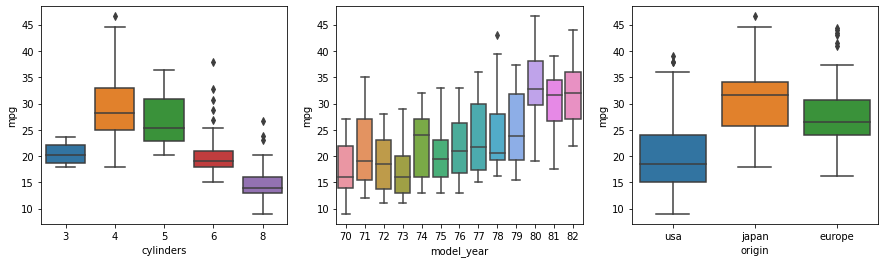

In [ ]:
fig, axes = plt.subplots(1,len(noms), figsize=(15,4))
axes = axes.flatten()
for nom, ax in zip(noms,axes):
  _=sns.boxplot(data=df, x=nom, y='mpg', ax=ax)

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

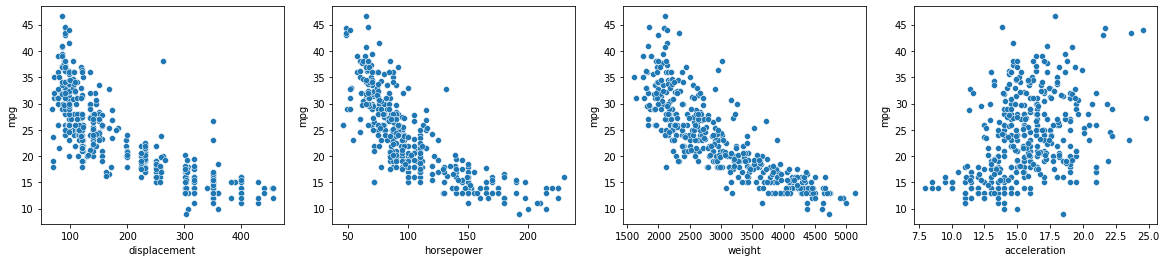

In [ ]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='mpg', ax=ax)

* `hue` 옵션에 `origin` 추가해서 그리기 

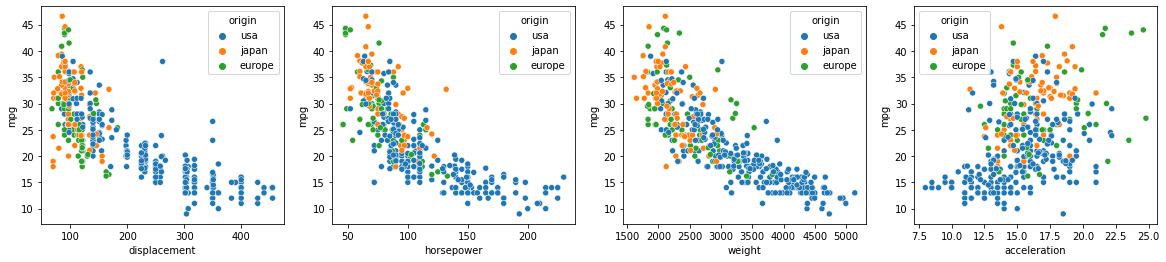

In [ ]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.scatterplot(data=df, x=col, y='mpg', ax=ax, hue='origin')

* `regplot`으로 회귀 시각화

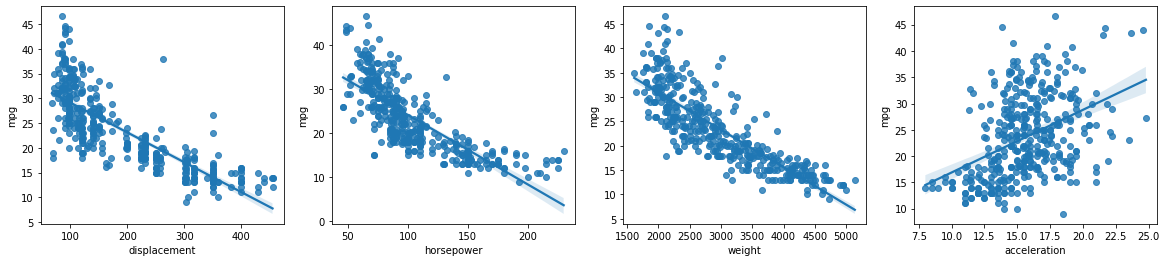

In [ ]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.regplot(data=df, x=col, y='mpg', ax=ax)

* `residplot`으로 잔차 시각화

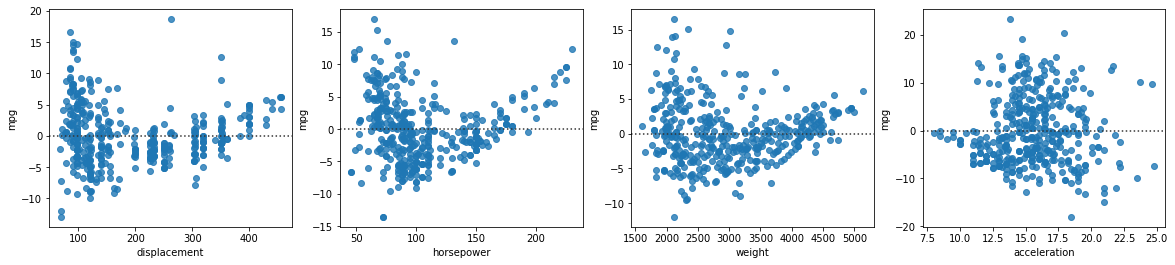

In [ ]:
fig, axes = plt.subplots(1, len(nums), figsize=(20,4))
axes = axes.flatten()
for col, ax in zip(nums, axes):
  sns.residplot(data=df, x=col, y='mpg', ax=ax)

* `lmplot`으로 `origin`별 회귀 시각화

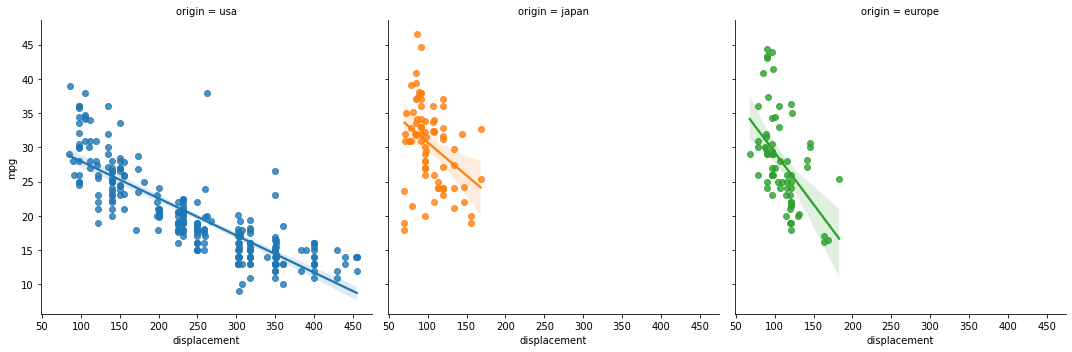

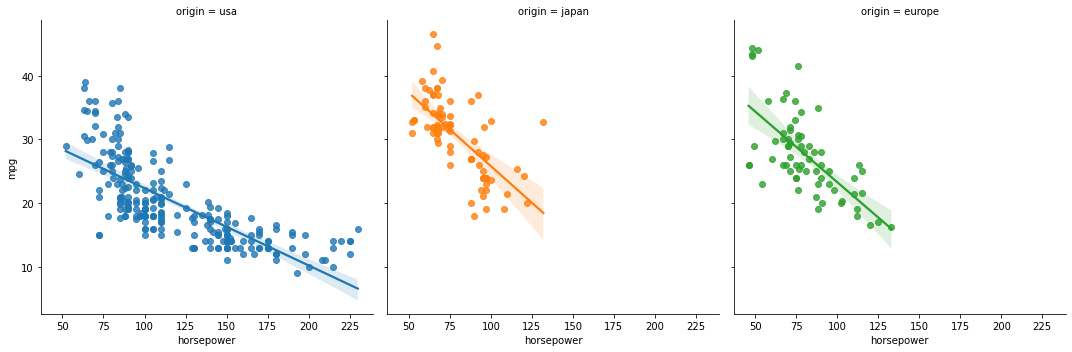

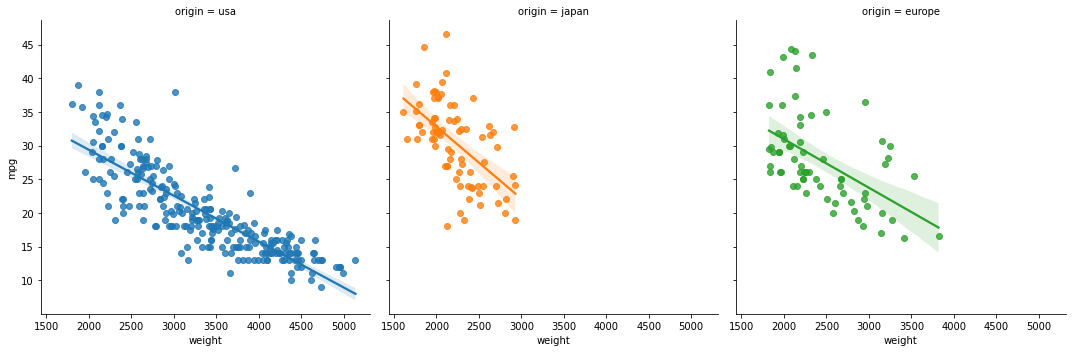

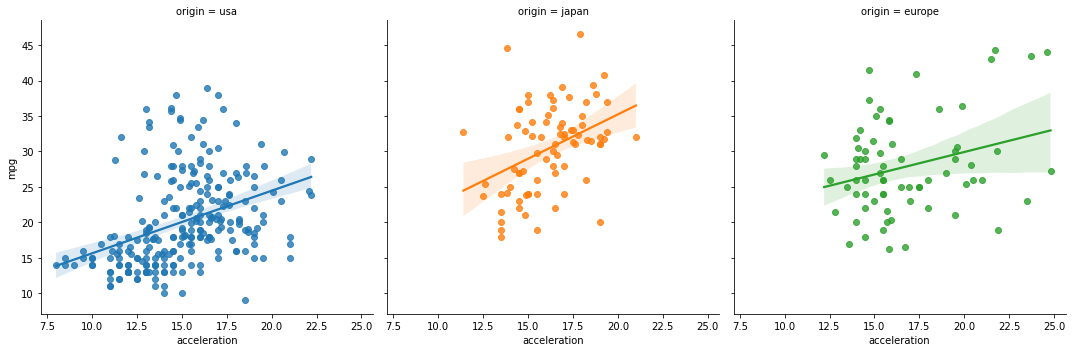

In [ ]:
for col, ax in zip(nums, axes):
  sns.lmplot(data=df, x=col, y='mpg', col='origin', hue='origin')
  plt.show()